In [1]:
print('hello world')

hello world


In [41]:
import pandas as pd
data ={
    "name": ["John", "Anna", "Michael"],
    "age": [22, 51, 88],
    "score": [88,87,100.0]
}
df = pd.DataFrame(data)
# print(df)

# df.head()             # First 5 rows
# df.info()             # Summary
# df.describe()         # Stats
# df["age"]             # Get column
# df[["name", "score"]] # Multiple columns
# df.loc[1]             # First row
# df.iloc[1]            # Row by index

df[df['score'] > 80]
df.sort_values(by='score', ascending=False)




,name,age,score
2,Michael,88,100.0
0,John,22,88.0
1,Anna,51,87.0


In [45]:
df['passed'] = df['age'] >= 50
df.head(10)
df.groupby('passed')['score'].mean()


df.to_csv("data.csv", index=False)       # Write CSV
df2 = pd.read_csv("data.csv")            # Read CSV


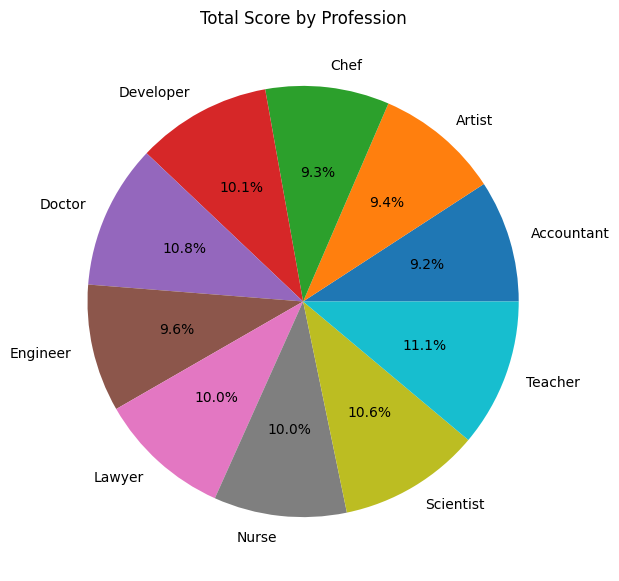

In [66]:

import pandas as pd
import random
from faker import Faker
import matplotlib.pyplot as plt

# Initialize faker and random seed
fake = Faker()
Faker.seed(0)
random.seed(0)

# Define your options
sex_options = ["Male", "Female"]
professions = ["Engineer", "Doctor", "Teacher", "Artist", "Developer",
               "Nurse", "Scientist", "Lawyer", "Accountant", "Chef"]

# Number of rows to generate
num_rows = 1000

# Generate the data
data = {
    "Name": [fake.name() for _ in range(num_rows)],
    "Age": [random.randint(18, 65) for _ in range(num_rows)],
    "Score": [round(random.uniform(0, 100), 2) for _ in range(num_rows)],
    "Sex": [random.choice(sex_options) for _ in range(num_rows)],
    "Profession": [random.choice(professions) for _ in range(num_rows)],
}

# Create DataFrame
df = pd.DataFrame(data)

# Optional: preview first rows
df

# Group by profession and sum the scores
score_sum = df.groupby('Profession')['Score'].sum()

# Plot as pie chart
score_sum.plot.pie(
    autopct='%1.1f%%',
    figsize=(7, 7),
    title='Total Score by Profession'
)

plt.ylabel("")  # Optional: hides the y-axis label
plt.show()

In [67]:
import plotly.express as px
# Group by Sex and Profession, and sum the Score
grouped = df.groupby(['Sex', 'Profession'])['Score'].sum().reset_index()

grouped

# # Build sunburst chart
# fig = px.sunburst(
#     grouped,
#     path=['Sex', 'Profession'],   # Hierarchical levels
#     values='Score',               # Size of slices
#     title='Score Sum by Sex and Profession'
# )
# fig.show()

,Sex,Profession,Score
0,Female,Accountant,2129.65
1,Female,Artist,2381.05
2,Female,Chef,2256.39
3,Female,Developer,2369.63
4,Female,Doctor,2643.20
5,Female,Engineer,2104.66
6,Female,Lawyer,2519.62
7,Female,Nurse,2611.96
8,Female,Scientist,2778.73
9,Female,Teacher,2767.55


In [69]:
import numpy as np

np.arange(97, 99.01, 0.01)

array([97.  , 97.01, 97.02, 97.03, 97.04, 97.05, 97.06, 97.07, 97.08,
       97.09, 97.1 , 97.11, 97.12, 97.13, 97.14, 97.15, 97.16, 97.17,
       97.18, 97.19, 97.2 , 97.21, 97.22, 97.23, 97.24, 97.25, 97.26,
       97.27, 97.28, 97.29, 97.3 , 97.31, 97.32, 97.33, 97.34, 97.35,
       97.36, 97.37, 97.38, 97.39, 97.4 , 97.41, 97.42, 97.43, 97.44,
       97.45, 97.46, 97.47, 97.48, 97.49, 97.5 , 97.51, 97.52, 97.53,
       97.54, 97.55, 97.56, 97.57, 97.58, 97.59, 97.6 , 97.61, 97.62,
       97.63, 97.64, 97.65, 97.66, 97.67, 97.68, 97.69, 97.7 , 97.71,
       97.72, 97.73, 97.74, 97.75, 97.76, 97.77, 97.78, 97.79, 97.8 ,
       97.81, 97.82, 97.83, 97.84, 97.85, 97.86, 97.87, 97.88, 97.89,
       97.9 , 97.91, 97.92, 97.93, 97.94, 97.95, 97.96, 97.97, 97.98,
       97.99, 98.  , 98.01, 98.02, 98.03, 98.04, 98.05, 98.06, 98.07,
       98.08, 98.09, 98.1 , 98.11, 98.12, 98.13, 98.14, 98.15, 98.16,
       98.17, 98.18, 98.19, 98.2 , 98.21, 98.22, 98.23, 98.24, 98.25,
       98.26, 98.27,

In [119]:
# df.to_csv("data.csv", index=False)       # Write CSV
df2 = pd.read_csv("data.csv")            # Read CSV
df2

#
# pd.pivot_table(df,
#                values='Score',
#                index='Sex',
#                columns='Profession',
#                aggfunc='sum')
#
#
# df.groupby(['Sex', 'Profession', 'Age'])['Score'].mean().reset_index()
#
# df.groupby(['Sex', 'Profession', 'Age'])['Score'].mean().unstack('Age')


pivot = pd.pivot_table(
    df,
    values='Score',
    index='Sex',
    columns='Profession',
    aggfunc='mean'
)

folded = pivot.reset_index().melt(id_vars='Sex', var_name='Profession', value_name='AvgScore')
folded
pivot



KeyboardInterrupt: 

In [141]:
df.duplicated().sum()


data ={
    "name": ["John", "Anna", "Michael", "Michael"],
    "age": [22, 51, 88,88],
    "score": [88,87,100.0,100]
}

raw = pd.DataFrame(data)
# Group by 'name' and count rows
name_counts = raw['name'].value_counts()
# name_counts

# Keep only names that appear more than once
frequent_names = name_counts[name_counts > 1].index
print('freqname = ' , frequent_names)
type(frequent_names)


# # Filter rows where name is in the frequent list
# filtered = raw[raw['name'].isin(frequent_names)]
# filtered




freqname =  Index(['Michael'], dtype='object', name='name')


pandas.core.indexes.base.Index

In [114]:
df.groupby('Profession')['Score'].mean()

Profession
Accountant    53.585465
Artist        55.275176
Chef          47.625000
Developer     49.808333
Doctor        51.742286
Engineer      50.042500
Lawyer        50.643939
Nurse         49.569208
Scientist     49.046606
Teacher       46.863361
Name: Score, dtype: float64

In [131]:
df.nlargest(5, 'Age')
df

df.filter(regex='S.*e')

df.query('Age > 50 and Score < 20')
df
# df.at[4, 'Score']

,Name,Age,Score,Sex,Profession
0,Norma Fisher,42,72.71,Female,Chef
1,Jorge Sullivan,44,22.67,Female,Developer
2,Elizabeth Woods,20,75.16,Female,Artist
3,Susan Wagner,34,28.79,Female,Doctor
4,Peter Montgomery,50,10.55,Female,Scientist
...,...,...,...,...,...
995,Howard Anderson,18,33.81,Male,Lawyer
996,Jacob Rivera,35,68.54,Female,Artist
997,Lori Rodriguez,58,16.32,Male,Chef
998,Whitney Diaz,62,55.74,Male,Doctor


In [143]:
num_rows = 1000
[round(random.uniform(0, 100), 2) for _ in range(num_rows)],

([30.33,
  31.91,
  13.12,
  96.33,
  99.58,
  61.91,
  17.97,
  41.61,
  1.32,
  78.86,
  13.77,
  51.51,
  71.53,
  66.71,
  27.01,
  41.68,
  93.59,
  6.0,
  24.92,
  26.63,
  33.72,
  10.5,
  83.94,
  49.21,
  83.12,
  5.81,
  26.49,
  10.78,
  28.47,
  91.67,
  23.26,
  97.93,
  19.93,
  68.51,
  12.17,
  98.39,
  66.48,
  97.02,
  34.63,
  39.07,
  87.73,
  66.9,
  53.47,
  68.49,
  25.39,
  70.92,
  51.12,
  73.65,
  89.88,
  10.46,
  97.54,
  67.41,
  35.29,
  14.74,
  12.19,
  73.17,
  79.82,
  75.88,
  17.4,
  89.95,
  24.71,
  91.64,
  92.23,
  58.03,
  24.05,
  47.76,
  19.27,
  42.65,
  93.09,
  92.84,
  99.61,
  79.16,
  14.05,
  81.71,
  35.12,
  12.97,
  93.4,
  46.09,
  76.78,
  31.89,
  60.97,
  48.41,
  28.34,
  41.07,
  80.0,
  46.36,
  17.75,
  76.29,
  86.89,
  23.13,
  62.58,
  42.53,
  62.69,
  58.35,
  29.53,
  54.12,
  3.11,
  4.9,
  98.62,
  41.24,
  36.78,
  88.71,
  24.54,
  65.34,
  10.84,
  11.67,
  60.53,
  29.6,
  48.54,
  24.62,
  77.74,
  93.14,
  59.